In [620]:
!pip install matplotlib
!pip install seaborn

In [619]:
import numpy as np
import matplotlib as plt
import math as mt
import seaborn as sb
import pandas as pd
import scipy.stats as sps
import os

%matplotlib inline

In [618]:
class prognoz:
    ''' 
    
        '''
    value = 0 
    
    def __init__(self, array_x, array_y):
        self.array_x = array_x
        self.array_y = array_y
    
    def sum_x(self):
        return(sum(self.array_x))
        
    def sum_y(self):
        return(sum(self.array_y[i] for i in range(len(self.array_y))))

    def square_x(self):
        return(sum(self.array_x[i]**2 for i in range(len(self.array_x))))
        
    def sum_xy(self):
        return(sum([self.array_x[i] * self.array_y[i] for i in range(len(self.array_x))]))
    
    def var_a(self):
        return((len(self.array_x)*prognoz.sum_xy(self) - prognoz.sum_x(self) * prognoz.sum_y(self))/
        (len(self.array_x)*prognoz.square_x(self) - (prognoz.sum_x(self)**2)))
    
    def var_b(self):
        return((prognoz.sum_y(self)-prognoz.var_a(self)*prognoz.sum_x(self)) / (len(self.array_x)))
    
    def array_f(self):
        return([prognoz.var_a(self)*self.array_x[i] + prognoz.var_b(self) 
                for i in range(len(self.array_x))])
    
    def approx_func(self):
        a = [prognoz.array_f(self)[i] - (prognoz.var_a(self)*self.array_x[i]+ prognoz.var_b(self)) 
                                         for i in range(len(prognoz.array_f(self)))]
        return([a[i]**2 for i in range(len(a))]) 
     
        '''тут начинается расчет квадратичной функции
        она отличается только тем что добавляются 3 и 4 степени массива x.
            '''
        
    def sum_3_degree(self):
        return(sum(self.array_x[i]**3 for i in range(len(self.array_x))))

    def sum_4_degree(self):
        return(sum(self.array_x[i]**4 for i in range(len(self.array_x))))

    def sum_x2_y(self):
        return(sum([(self.array_x[i]**2)*self.array_y[i] for i in range(len(self.array_x))]))


    def main_matrix(self):
        '''
        основная матрица имеет вид (если что)
            ax^4+bx^3+сx^2
            ax^3+bx^2+cx
            ax^2+bx+cn, 
            где n - длина массива
        '''
        return([
                [prognoz.sum_4_degree(self), prognoz.sum_3_degree(self),prognoz.square_x(self)],
                [prognoz.sum_3_degree(self), prognoz.square_x(self), prognoz.sum_x(self)],
                [prognoz.square_x(self), prognoz.sum_x(self), len(self.array_x)]
                ])
    
    def det(self):
        return(np.linalg.det(np.matrix(prognoz.main_matrix(self))))

    def var_abc(self):
        a = np.array(prognoz.main_matrix(self))
        b = np.array([prognoz.sum_x2_y(self), prognoz.sum_xy(self), prognoz.sum_y(self)])
        return(np.linalg.inv(a).dot(b))
        
    def array_square_f(self):
        return([prognoz.var_abc(self)[0]*(self.array_x[i]**2)+
                (prognoz.var_abc(self)[1]*self.array_x[i])+
                prognoz.var_abc(self)[2] for i in range(len(self.array_x))])
        
    ''' дальше идет общие задания для пунктов'''
    def dispersion(self):
        '''
        тут должна быть расчитана дисперсия
            '''
    def function_str(self):
        '''проблема: при отрицательных значениях + остается'''
        y1 =('Вид линейной аппроксимирующей функции:\n  y = {}x+{}\n'
            .format(round(prognoz.var_a(self), 2), round(prognoz.var_b(self), 2),round(prognoz.var_abc(self)[2]), 2))
        y2 =('Вид квадратичной аппроксимирующей функции:\n  y = {}x^2+{}x+{}'
            .format(round(prognoz.var_abc(self)[0], 2), round(prognoz.var_abc(self)[1], 2),round(prognoz.var_abc(self)[2]), 2))
        return(y1, y2)
    
    
        #по рисунку, он еще недоработан
    def draw_board(self):

        dict_xy = {
            'x': self.array_x,
            'y': self.array_y
        }

        dict_xf = {
            'x': self.array_x,
            'y': self.array_y,
            'f': prognoz.array_f(self)
        }
        
        dict_xf_2 = {
            'x': self.array_x,
            'y': self.array_y,
            'f^2': prognoz.array_square_f(self),
        }

        df_xy = pd.DataFrame(dict_xy)
        df_xf = pd.DataFrame(dict_xf)
        df_xf_2 = pd.DataFrame(dict_xf_2)

        print(df_xy)
        print(df_xf)
        print(df_xf_2)

        sb.scatterplot(data = df_xy, x='x', y='y')
        sb.lineplot(data = df_xf, x='x', y='f')
       
        sb.scatterplot(data = df_xy, x='x', y='y')
        sb.lineplot(data = df_xf_2, x='x', y='f^2')

In [606]:
prog = prognoz([1, 2, 3, 4, 5], [5,15,25,45,65])

15
155
55
615
-14.0
15.0
[1.0, 16.0, 31.0, 46.0, 61.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
   x   y
0  1   5
1  2  15
2  3  25
3  4  45
4  5  65
   x   y     f
0  1   5   1.0
1  2  15  16.0
2  3  25  31.0
3  4  45  46.0
4  5  65  61.0
   x   y        f^2
0  1   5   5.285714
1  2  15  13.857143
2  3  25  26.714286
3  4  45  43.857143
4  5  65  65.285714
None
Вид линейной аппроксимирующей функции:
  y = 15.0x+-14.0
 Вид квадратичной аппроксимирующей функции:
  y = 2.14x^2+2.14x+1


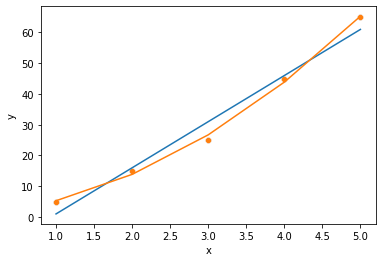

In [607]:
#не все нижеперечисленное обязано быть вызваным
print(prog.sum_x()) #сумма х
print(prog.sum_y()) #сумма значений y
print(prog.square_x()) #сумма квадратов x
print(prog.sum_xy()) #сумма произведений x и y
print(prog.var_b()) #значение b в линейной функции
print(prog.var_a()) #значение a в квадратичной
print(prog.array_f()) #аппроксимированные значения
print(prog.approx_func()) #поиск отклонений, где функция стремится к минимуму для линейной функции 
print(prog.draw_board()) #прорисовка (не закончена)
a, b = prog.function_str()
print(a,b) 

In [617]:
class clean_csv:
    ''' 
    
        '''
    def __init__(self, csv, portion = 0.1, max_iter=1000, file_name = 'cleaned_xy.csv'):
        self.csv = csv
        self.portion = portion
        self.max_iter = max_iter
        self.file_name = file_name
        
    def csv_file(self):
        return(pd.read_csv(self.csv, sep =';'))
    
    def boxplot(self):
        csv = clean_csv.csv_file(self)
        csv.boxplot(['Y'])
        
    def clean(self):
        csv = clean_csv.csv_file(self)
        for en, x in enumerate(['Y']):
            if en == self.max_iter:
                break
            q_75,q_25 = np.percentile(csv.loc[:,x],[75,25])
            intr_qr = q_75-q_25

            max = q_75+(1.5*intr_qr)
            min = q_25-(1.5*intr_qr)

            csv.loc[csv[x] < min,x] = np.nan
            csv.loc[csv[x] > max,x] = np.nan
        csv.isnull().sum()
        csv = csv.dropna(axis = 0)
        return(csv)
    
    def dispersion_difference(self):
        csv = clean_csv.csv_file(self)
        cleaned = clean_csv.clean(self)
        return(csv['Y'].var()-cleaned['Y'].var())
    
    def create_csv(self):
        csv = clean_csv.clean(self)
        try:
            csv.to_csv(self.file_name, sep=';')
        except PermissionError:
            print('Файл в режиме работы. Закройте файл и повторите попытку!')
        #return(os.path.abspath(self.file_name))
        return(os.system(self.file_name))

    X    Y
0   1   25
1   2   89
2   3  235
3   4   15
4   5   56
5   6   48
6   7   65
7   8   75
8   9   93
9  10   42
None
    X     Y
0   1  25.0
1   2  89.0
3   4  15.0
4   5  56.0
5   6  48.0
6   7  65.0
7   8  75.0
8   9  93.0
9  10  42.0
3107.6499999999996
0


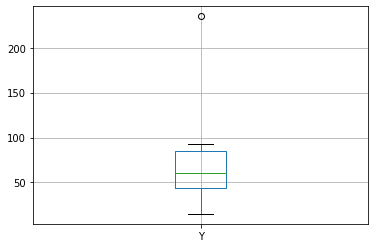

In [624]:
iqr = clean_csv('prog.csv')
print(iqr.csv_file()) #датафрейм
print(iqr.boxplot()) #ящик с усиками
print(iqr.clean()) #очищенная выборка
print(iqr.dispersion_difference()) #пункт 3 в) подсчет разницы дисперсий
print(iqr.create_csv()) #открывает файл